In [6]:
import os, sys
import numpy as np
import re
import pandas as pd

import matplotlib
%matplotlib inline
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

plt.style.use('ggplot')

caffe_root = '/home/ashu/Desktop/Thesis Work/Classifier/caffe/'
print os.getcwd()

/home/ashu/Desktop/Thesis Work/Classifier/caffe/models/script


In [15]:
log_file = caffe_root + 'models/gt_classifier/gen_umbrella/logs/train_40000.log'       #Change file name

with open (log_file, "r") as myfile:
    data=myfile.readlines()

In [16]:
#Seacrh keywords
keywords = ['accuracy = ', 'loss = ']
filtered_log = []
for line in data:
    for phrase in keywords:
        if phrase in line:
            filtered_log.append(line)
            break

print ''.join(filtered_log)
print len(filtered_log)

I0324 19:58:36.531390 13442 solver.cpp:397]     Test net output #0: accuracy = 0.45
I0324 19:58:36.531436 13442 solver.cpp:397]     Test net output #1: loss = 1.60702 (* 1 = 1.60702 loss)
I0324 19:58:36.677240 13442 solver.cpp:218] Iteration 0 (0 iter/s, 2.29602s/100 iters), loss = 2.8031
I0324 19:58:36.677264 13442 solver.cpp:237]     Train net output #0: loss = 2.8031 (* 1 = 2.8031 loss)
I0324 19:58:53.358750 13442 solver.cpp:397]     Test net output #0: accuracy = 0.807
I0324 19:58:53.358791 13442 solver.cpp:397]     Test net output #1: loss = 0.434887 (* 1 = 0.434887 loss)
I0324 19:58:53.488410 13442 solver.cpp:218] Iteration 100 (5.9486 iter/s, 16.8107s/100 iters), loss = 0.571903
I0324 19:58:53.488437 13442 solver.cpp:237]     Train net output #0: loss = 0.571903 (* 1 = 0.571903 loss)
I0324 19:59:10.152508 13442 solver.cpp:397]     Test net output #0: accuracy = 0.794
I0324 19:59:10.152546 13442 solver.cpp:397]     Test net output #1: loss = 0.417763 (* 1 = 0.417763 loss)
I0324 1

In [17]:
l_itr = []
l_accuracy = []
l_train_loss = []
l_test_loss = []

for i in range(len(filtered_log)):
    if 'accuracy' in filtered_log[i]:
        acc = re.findall('#0: accuracy = (\d+\.\d+)', filtered_log[i])
        l_accuracy.append(float(acc[0]))
    if '#1: loss' in filtered_log[i]:
        test_loss = re.findall('loss = (\d+\.\d+)', filtered_log[i])
        l_test_loss.append(float(test_loss[0]))
    #if '#0: loss' in filtered_log[i]:
        
        #train_loss = re.findall('loss = (\d+\.\d+)', filtered_log[i+4]) #for 50000 
    if 'Iteration' in filtered_log[i]:
        itr = re.findall('Iteration (\d+)', filtered_log[i])
        l_itr.append(int(itr[0]))
        
    if '#0: loss =' in filtered_log[i]:        
        #train_loss = re.findall(r"(\d+\.\d+)(?:[eE][+-]?\d+)?", filtered_log[i])
        train_loss = filtered_log[i].split('=')[2].split(' ')[1]
        #print train_loss
        l_train_loss.append(float(train_loss))
    
    
        
data = {'Iteration':l_itr,'Accuracy':l_accuracy, 'Train_Loss': l_train_loss, 'Test_Loss': l_test_loss}
df = pd.DataFrame(data)
print df.head(60)

    Accuracy  Iteration  Test_Loss  Train_Loss
0   0.450000          0   1.607020    2.803100
1   0.807000        100   0.434887    0.571903
2   0.794000        200   0.417763    0.556624
3   0.820000        300   0.382789    0.341512
4   0.836001        400   0.357119    0.749200
5   0.830000        500   0.365620    0.300795
6   0.820000        600   0.377319    0.549891
7   0.852000        700   0.329367    0.368198
8   0.834000        800   0.346562    0.285133
9   0.858000        900   0.322402    0.257712
10  0.839000       1000   0.349627    0.424743
11  0.851001       1100   0.326050    0.227105
12  0.833000       1200   0.340590    0.461257
13  0.869000       1300   0.285536    0.349982
14  0.853000       1400   0.336790    0.205019
15  0.864000       1500   0.318625    0.490045
16  0.849000       1600   0.323301    0.205372
17  0.876000       1700   0.304310    0.332613
18  0.843000       1800   0.337894    0.414738
19  0.881000       1900   0.269768    0.456760
20  0.837000 

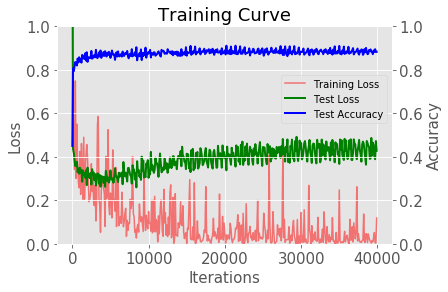

In [19]:
'''
Making learning curve
'''
fig, ax1 = plt.subplots()

#Plotting training and test losses
train_loss, = ax1.plot(data['Iteration'], data['Train_Loss'], color='red',  alpha=.5)
test_loss, = ax1.plot(data['Iteration'], data['Test_Loss'], linewidth=2, color='green')
ax1.set_ylim(ymin=0, ymax=1)
ax1.set_xlabel('Iterations', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.tick_params(labelsize=15)
#Plotting test accuracy
ax2 = ax1.twinx()
test_accuracy, = ax2.plot(data['Iteration'], data['Accuracy'], linewidth=2, color='blue')
ax2.set_ylim(ymin=0, ymax=1)
ax2.set_ylabel('Accuracy', fontsize=15)
ax2.tick_params(labelsize=15)
#Adding legend
plt.legend([train_loss, test_loss, test_accuracy], ['Training Loss', 'Test Loss', 'Test Accuracy'],  bbox_to_anchor=(1, 0.8))
plt.title('Training Curve', fontsize=18)
#plt.show()
#Saving learning curve
plt.savefig(caffe_root + 'models/gt_classifier/gen_umbrella/gen_umbrella.png')